In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from matplotlib.lines import Line2D
from geopy.distance import geodesic

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

wc_CDOM_data = '../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_WC.csv'

df = pd.read_csv(wc_CDOM_data, sep=',', index_col=0)
df = pd.DataFrame(df)

df.index = df.index.astype(str)
df_meta.index = df_meta.index.astype(str)

df.columns = ['a' + col for col in df.columns]

df_cdom = df.join(df_meta, how='inner')

df_cdom['file_id'] = df_cdom['afile_id']
df_cdom = df_cdom.drop('afile_id', axis = 1)

df_cdom

idx = df_cdom.groupby('code')['Sample_depth'].idxmax()
filtered_df = df_cdom.loc[idx]
result_df = filtered_df[['code', 'a320', 'a350', 'a412']]
result_df = result_df.set_index('code')

result_df = filtered_df.groupby('code')[['a320', 'a350', 'a412']].mean()

In [4]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)
df_riv = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/river_discharge_date.csv', sep=',', index_col=0)

flux_cdom_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc.csv', sep=',', index_col=0)

flux_cdom_pw_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv', sep=',', index_col=0)
flux_cdom_pw_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv', sep=',', index_col=0)
flux_cdom_pw_320 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_320.csv', sep=',', index_col=0)

flux_doc_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)

flux_tn_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_bc.csv', sep=',', index_col=0)
flux_tn_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_pw.csv', sep=',', index_col=0)

flux_fe2_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_bc.csv', sep=',', index_col=0)
flux_fe2_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_pw.csv', sep=',', index_col=0)
flux_fe3_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_bc.csv', sep=',', index_col=0)
flux_fe3_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_pw.csv', sep=',', index_col=0)

fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)
doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/DOC_stocks.csv', sep=',', index_col=0)
cdom_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/CDOM_stocks.csv', sep=',', index_col=0)

flux_inflection_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_inflection_bc.csv', sep=',', index_col=0)

ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
wc_doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Water_col_DOC_stocks.csv', sep=',', index_col=0)

dic_flux = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/GOM_DIC_BFLUX_03052024.csv')
dic_flux['code'] = dic_flux['Stn'] + '_' + dic_flux['camp']
dic_flux.index = dic_flux['code']

################################


flux_cdom_bc_412_join = flux_cdom_bc['bc_flux_aCDOM412']
flux_cdom_bc_350_join = flux_cdom_bc['bc_flux_aCDOM350']
flux_cdom_bc_320_join = flux_cdom_bc['bc_flux_aCDOM320']
flux_bc_infec_join = flux_cdom_bc['a_infelc']
flux_bc_infec_err_join = flux_cdom_bc['std_err_a_infelc']


flux_cdom_bc_412_std_join = flux_cdom_bc['bc_flux_err_aCDOM412']
flux_cdom_bc_350_std_join = flux_cdom_bc['bc_flux_err_aCDOM350']
flux_cdom_bc_320_std_join = flux_cdom_bc['bc_flux_err_aCDOM320']


flux_cdom_pw_350_join = flux_cdom_pw_350['pw_flux_aCDOM350']
flux_cdom_pw_412_join = flux_cdom_pw_412['pw_flux_aCDOM412']
flux_cdom_pw_320_join = flux_cdom_pw_320['pw_flux_aCDOM320']


flux_doc_bc_join = flux_doc_bc['bc_flux_doc']

flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
flux_doc_pw_error_join = flux_doc_pw['pw_flux_doc_error']

flux_tn_bc_join = flux_tn_bc['bc_flux_tn']

flux_tn_pw_join = flux_tn_pw['pw_flux_tn']
flux_tn_pw_error_join = flux_tn_pw['pw_flux_tn_error']

flux_fe2_bc_join = flux_fe2_bc['bc_flux_fe2']

flux_fe2_pw_join = flux_fe2_pw['pw_flux_fe2']
flux_fe2_pw_error_join = flux_fe2_pw['pw_flux_fe2_error']

flux_fe3_bc_join = flux_fe3_bc['bc_flux_fe3']

flux_fe3_pw_join = flux_fe3_pw['pw_flux_fe3']
flux_fe3_pw_error_join = flux_fe3_pw['pw_flux_fe3_error']

flux_dic_bc_join = dic_flux['dic_flux']

ncs_stocks['OCmol_5cm_deepM3'] = ncs_stocks['OCg_5cm_deep/M2'] / 12 
ncs_stocks['Cmol_5cm_deepM3'] = ncs_stocks['Cg_5cm_deep/M2'] / 12 
ncs_stocks['Nmol_5cm_deepM3'] = ncs_stocks['Ng_5cm_deep/M2'] / 14 
ncs_stocks['C:N_mol_5cm_deepM3'] = ncs_stocks['Cmol_5cm_deepM3'] / ncs_stocks['Ng_5cm_deep/M2'] 


fe_stocks_join = fe_stocks
cdom_stocks_join = cdom_stocks

df_riv = df_riv.drop(columns=['date'])
doc_stocks_join = doc_stocks

df = df_o2.join(ncs_stocks)
df = df.join(df_riv)
df = df.join(fe_stocks_join)
df = df.join(doc_stocks_join)
df = df.join(cdom_stocks_join)
df = df.join(wc_doc_stocks)

df = df.join(flux_cdom_bc_412_join)
df = df.join(flux_cdom_pw_412_join)

df = df.join(flux_cdom_bc_320_join)
df = df.join(flux_cdom_pw_320_join)

df = df.join(flux_cdom_bc_350_join)
df = df.join(flux_cdom_pw_350_join)

df = df.join(flux_cdom_bc_412_std_join)
df = df.join(flux_cdom_bc_320_std_join)
df = df.join(flux_cdom_bc_350_std_join)
df = df.join(flux_bc_infec_join)
df = df.join(flux_bc_infec_err_join)

df = df.join(flux_doc_bc_join)
df = df.join(flux_doc_pw_join)
df = df.join(flux_doc_pw_error_join)

df = df.join(flux_tn_bc_join)
df = df.join(flux_tn_pw_join)
df = df.join(flux_tn_pw_error_join)

df = df.join(flux_fe2_bc_join)
df = df.join(flux_fe2_pw_join)
df = df.join(flux_fe2_pw_error_join)

df = df.join(flux_fe3_bc_join)
df = df.join(flux_fe3_pw_join)
df = df.join(flux_fe3_pw_error_join)

df = df.join(result_df)

df = df.join(flux_dic_bc_join)


df['Camp'] = df["camp"]
df['Stn'] = df["station"]
df = df.drop(columns=['code.1'])

df['rgn'] = 'default'

df.loc[df['station'].isin(['St.2', 'St.16', 'St.16-2']), 'rgn'] = 'riv'
df.loc[df['station'].isin(['St.5B', 'St.MK', 'St.MK-2', 'St.ML', 'St.4', 'St.6']), 'rgn'] = 'hypox'
df.loc[df['station'].isin(['St.7', 'St.9', 'St.14', 'St.14.5']), 'rgn'] = 'shelf'
df.loc[df['station'].isin(['St.11', 'St.12', 'St.13', 'St.15']), 'rgn'] = 'slope'

df['season'] = 'default'

df.loc[df['camp'].isin(['GOM21FA']), 'season'] = 'fall'
df.loc[df['camp'].isin(['GOM22SU', 'GOM2021']), 'season'] = 'summer'
df.loc[df['camp'].isin(['GOM22SP']), 'season'] = 'spring'

#df['OCkg_5cm_deep_M3'] = df['OCg_5cm_deep/M2'] / 1000
#df['OCkg_25cm_deep_M3'] = df['OCg_25cm_deep/M2'] / 1000

df['Date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['Date'].dt.dayofyear

df['Fe2_m3'] = df['fe2_mol_per_m3_0_to_25cm']
df['Fe3_m3'] = df['fe3_mol_per_m3_0_to_25cm']

df['Fe2_m3_top'] = df['fe2_mol_per_m3_0_to_5cm']
df['Fe3_m3_top'] = df['fe3_mol_per_m3_0_to_5cm']

# Function to calculate distance
def calculate_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, -89.24593056)  # Coordinates of delta
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lat_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, row['longitude_bottom'])  
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lon_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (row['latitude_bottom'], -89.24593056)  
    return geodesic(start, end).kilometers

# Apply function to create new column
df['distance_to_delta_km'] = df.apply(calculate_distance, axis=1)
df['distance_to_delta_lat_km'] = df.apply(calculate_lat_distance, axis=1)
df['distance_to_delta_lon_km'] = df.apply(calculate_lon_distance, axis=1)


#df.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_Stock_O2_summary.csv')

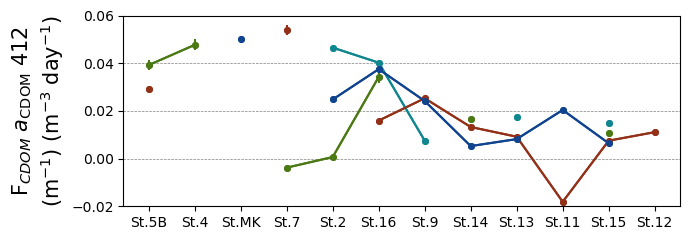

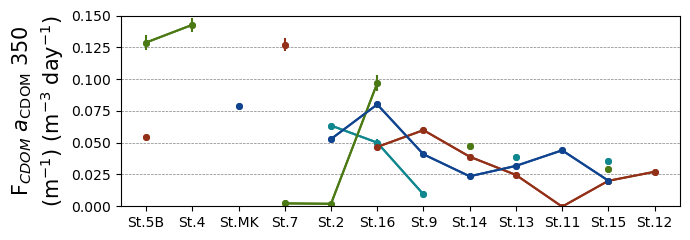

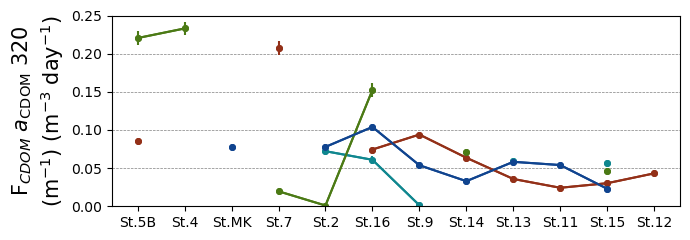

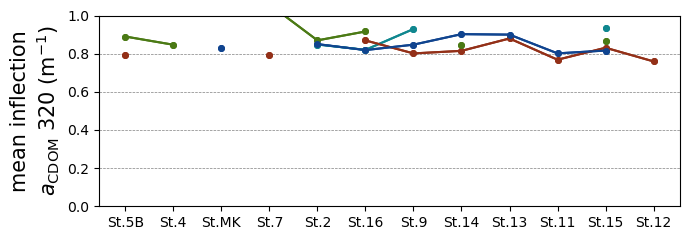

In [6]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

def line_plot_stock(data_f, flux_col, ylabels, title): 

    color_map = {
        'GOM2021': '#10878f',
        'GOM21FA': '#933018',
        'GOM22SP': '#4b7a15',
        'GOM22SU': '#10448f'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(7, 2.5))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')


    ax.set_ylim(y_min_min_val, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=10)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/{save_name}.png')

    plt.show()


y_min_max_val = .06
y_min_min_val = -.02
ylabes = r'F$_{CDOM}$ $a_{\mathrm{CDOM}}$ 412'+'\n'+'(m$^{-1}$) (m$^{-3}$ day$^{-1}$)'
tlabes = ''
data_f = df
flux_col = "bc_flux_aCDOM412"
save_name = 'bc_flux_aCDOM412'
error_col = "bc_flux_err_aCDOM412"

line_plot_stock(data_f, flux_col, ylabes, tlabes)


y_min_max_val = .15
y_min_min_val = 0
ylabes = r'F$_{CDOM}$ $a_{\mathrm{CDOM}}$ 350'+'\n'+'(m$^{-1}$) (m$^{-3}$ day$^{-1}$)'
tlabes = ''
data_f = df
flux_col = "bc_flux_aCDOM350"
save_name = 'bc_flux_aCDOM350'
error_col = "bc_flux_err_aCDOM350"

line_plot_stock(data_f, flux_col, ylabes, tlabes)


y_min_max_val = .25
y_min_min_val = 0
ylabes = r'F$_{CDOM}$ $a_{\mathrm{CDOM}}$ 320'+'\n'+'(m$^{-1}$) (m$^{-3}$ day$^{-1}$)'
tlabes = ''
data_f = df
flux_col = "bc_flux_aCDOM320"
save_name = 'bc_flux_aCDOM320'
error_col = "bc_flux_err_aCDOM320"

line_plot_stock(data_f, flux_col, ylabes, tlabes)


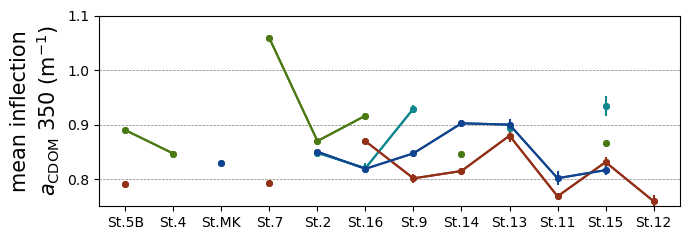

In [11]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

def line_plot_stock(data_f, flux_col, ylabels, title): 

    color_map = {
        'GOM2021': '#10878f',
        'GOM21FA': '#933018',
        'GOM22SP': '#4b7a15',
        'GOM22SU': '#10448f'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(7, 2.5))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')


    ax.set_ylim(y_min_min_val, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=10)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = 1.1
y_min_min_val = .75
ylabes = 'mean inflection'+'\n'+r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
tlabes = ''
data_f = df
flux_col = "a_infelc"
save_name = 'a_infelc'
error_col = "std_err_a_infelc"

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

def line_plot_stock(data_f, flux_col, ylabels, title): 

    color_map = {
        'GOM2021': '#10878f',
        'GOM21FA': '#933018',
        'GOM22SP': '#4b7a15',
        'GOM22SU': '#10448f'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(7, 2.5))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=4, marker='o')


    ax.set_ylim(y_min_min_val, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=10)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/{save_name}.png')

    plt.show()


y_min_min_val = 0
y_min_max_val = 100
ylabes = r'Pore Water mean'+'\n'+'$a_{\mathrm{CDOM}}$ 412 (m$^{-1}$)'+'\n'+'0-5 cm interval'
tlabes = ''
data_f = df
flux_col = "pw_mean_a412_0_to_5cm"
error_col = "pw_mean_a412_0_to_5cm_std"
save_name = 'pw_line_plot_aCDOM_412_mean_surf'
line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_min_val = 0
y_min_max_val = 100
ylabes = r'Pore Water mean'+'\n'+'$a_{\mathrm{CDOM}}$ 412 (m$^{-1}$)'+'\n'+'5-25 cm interval'
tlabes = ''
data_f = df
flux_col = "pw_mean_a412_5_to_25cm"
error_col = "pw_mean_a412_0_to_5cm_std"
save_name = 'pw_line_plot_aCDOM_412_mean_deep'
line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_min_val = 0
y_min_max_val = 100
ylabes = r'Pore Water mean'+'\n'+'$a_{\mathrm{CDOM}}$ 412 (m$^{-1}$)'+'\n'+'0-5 cm interval'
tlabes = ''
data_f = df
flux_col = "rz_mean_a412_0_to_5cm"
error_col = "pw_mean_a412_0_to_5cm_std"
save_name = 'rz_line_plot_aCDOM_412_mean_surf'
line_plot_stock(data_f, flux_col, ylabes, tlabes)

y_min_min_val = 0
y_min_max_val = 100
ylabes = r'Pore Water mean'+'\n'+'$a_{\mathrm{CDOM}}$ 412 (m$^{-1}$)'+'\n'+'5-25 cm interval'
tlabes = ''
data_f = df
flux_col = "rz_mean_a412_5_to_25cm"
error_col = "pw_mean_a412_0_to_5cm_std"
save_name = 'rz_line_plot_aCDOM_412_mean_deep'
line_plot_stock(data_f, flux_col, ylabes, tlabes)



In [ ]:
color_map = {
    'GOM2021': '#10878f',
    'GOM21FA': '#933018',
    'GOM22SP': '#4b7a15',
    'GOM22SU': '#10448f'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_fe3'
y_var = 'bc_flux_aCDOM320'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_fe3',  r'dFe(III) flux'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM320', r'$a_{\mathrm{CDOM}}$ 320 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'pw_flux_fe3'
y_var = 'bc_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_fe3',  r'dFe(III) flux'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'pw_flux_fe2'
y_var = 'bc_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_fe2',  r'dFe(II) flux'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'pw_flux_fe2'
y_var = 'bc_flux_aCDOM412'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_fe2',  r'dFe(II) flux'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'pw_flux_fe2'
y_var = 'bc_flux_aCDOM412'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_fe2',  r'dFe(II) flux'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'fe3_mol_per_m3_0_to_5cm'
y_var = 'bc_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('fe3_mol_per_m3_0_to_5cm',  r'dFe(III) inventory'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'fe2_mol_per_m3_0_to_5cm'
y_var = 'bc_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('fe2_mol_per_m3_0_to_5cm',  r'dFe(II) inventory'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'fe2_mol_per_m3_0_to_5cm'
y_var = 'a_infelc'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('fe2_mol_per_m3_0_to_5cm',  r'dFe(II) inventory'), size=15)
axes.set_ylabel(y_var.replace('a_infelc', r'mean inflection $a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'fe3_mol_per_m3_0_to_5cm'
y_var = 'a_infelc'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('fe3_mol_per_m3_0_to_5cm',  r'dFe(III) inventory'), size=15)
axes.set_ylabel(y_var.replace('a_infelc', r'mean inflection '+'\n'+' $a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
x_var = 'fet_mol_per_m3_0_to_5cm'
y_var = 'a_infelc'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('fet_mol_per_m3_0_to_5cm',  r'dFe inventory'), size=15)
axes.set_ylabel(y_var.replace('a_infelc', r'mean inflection '+'\n'+' $a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.75
extent=[lon_left, lon_rigth, lat_bot, lat_top]
res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "pw_mean_a412_0_to_5cm"
cb_name = r'Pore Water Mean CDOM 0-5 cm'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_mean_a412_0_to_25cm"
cb_name = r'Pore Water Mean CDOM 0-25 cm'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "rz_mean_a412_0_to_5cm"
cb_name = r'Rhizon Water Mean CDOM 0-5 cm'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "rz_mean_a412_0_to_25cm"
cb_name = r'Rhizon Water Mean CDOM 0-25 cm'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)



In [ ]:
def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=df_subset[topic].max()*-1.1,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "bc_flux_aCDOM320"
cb_name = r'Benthic Chamber'+'\n'+r'$a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "bc_flux_aCDOM350"
cb_name = r'Benthic Chamber'+'\n'+r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "bc_flux_aCDOM412"
cb_name = r'Benthic Chamber'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_aCDOM320"
cb_name = r'Pore Water Profiles'+'\n'+r'$a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_aCDOM350"
cb_name = r'Pore Water Profiles'+'\n'+r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_aCDOM412"
cb_name = r'Pore Water Profiles'+'\n'+r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'
grad = cmo.balance
map_fluxes(data_f, topic,cb_name, grad)



In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a320'
y_var = 'pw_flux_aCDOM320'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a320',  r'Bottom Water $a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('pw_flux_aCDOM320', r'$a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a350'
y_var = 'pw_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a350',  r'Bottom Water $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('pw_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a412'
y_var = 'pw_flux_aCDOM412'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a412',  r'Bottom Water $a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('pw_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a320'
y_var = 'bc_flux_aCDOM320'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a320',  r'Bottom Water $a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM320', r'$a_{\mathrm{CDOM}}$ 320 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a350'
y_var = 'bc_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a350',  r'Bottom Water $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM350', r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'a412'
y_var = 'bc_flux_aCDOM412'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('a412',  r'Bottom Water $a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'), size=15)
axes.set_ylabel(y_var.replace('bc_flux_aCDOM412', r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'+'\n'+r'$m^{-2}$ $day^{-1}$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first set of bars on the primary y-axis
    ax1.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax1.set_ylabel(y_col_lab1, color=color1, size=15)  # Label the primary y-axis
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the second set of bars on the secondary y-axis
    ax2.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)
    ax2.set_ylabel(y_col_lab2, color=color2, size=15)  # Label the secondary y-axis
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add labels, title, and legend
    ax1.set_xlabel('')
    ax1.set_xticks(r)
    ax1.set_xticklabels(categories, size=12)
    ax1.set_title(title, size=15)


    ax1.set_ylim(0, 3.5)
    ax2.set_ylim(0, .35)
    
    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show the plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'$a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$) '+r'$m^{-2}$ $day^{-1}$'

color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021'+ '\n' + f"{ylabel}", 'pw_bc_flux_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021'+ '\n' + f"{ylabel}", 'pw_bc_flux_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022'+ '\n' + f"{ylabel}", 'pw_bc_flux_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022'+ '\n' + f"{ylabel}", 'pw_bc_flux_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'pw_flux_aCDOM350', 'bc_flux_aCDOM350',
                       ylabel, title, save_name, 'Diffusive Flux' ,
                       'Sediment Flux', color1, color2)

In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 100)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'Pore Water mean $a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_CDOM_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_CDOM_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_CDOM_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_CDOM_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'pw_mean_a412_0_to_5cm', 'pw_mean_a412_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 100)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'Pore Water mean $a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_CDOM_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_CDOM_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_CDOM_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_CDOM_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'pw_mean_a412_0_to_5cm', 'pw_mean_a412_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

y_min_max_val = .13

ylabes = r'Pore Water'+'\n'+'Fe (III) mol (m$^{-3}$)'
tlabes = '0 - 25 cm interval'
data_f = df
flux_col = "fe3_mol_per_m3_0_to_25cm"
save_name = 'pw_line_plot_Fe3_depth_int'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, .175)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'Fe(III) inventory $(mols$ $m^{-3})$'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_fe3_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_fe3_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_fe3_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_fe3_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'fe3_mol_per_m3_0_to_5cm', 'fe3_mol_per_m3_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 75)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'Rhizon mean $a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'rz_CDOM_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'rz_CDOM_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'rz_CDOM_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'rz_CDOM_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'rz_mean_a412_0_to_5cm', 'rz_mean_a412_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2, catagorie_list):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(catagorie_list)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(catagorie_list)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(len(catagorie_list), 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(catagorie_list, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 110)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'mean $a_{\mathrm{CDOM}}$ 412 (m$^{-1}$)'

catagorie_list_fa = [ 'St.MK','St.16', 'St.9', 'St.13']
catagorie_list_sp = ['St.5B', 'St.7', 'St.16', 'St.9', 'St.14', 'St.13', 'St.15']
catagorie_list_su = ['St.5B', 'St.MK', 'St.7', 'St.16', 'St.14', 'St.13']


# List of datasets to plot
datasets = [
    ('GOM21FA', 'Fall 2021', 'rz_cent_CDOM_ind_bar_plot_GOM21FA', 'blue', '#15154a', catagorie_list_fa),
    ('GOM22SP', 'Spring 2022', 'rz_cent_CDOM_ind_bar_plot_GOM22SP', 'green', '#193617', catagorie_list_sp),
    ('GOM22SU', 'Summer 2022', 'rz_cent_CDOM_ind_bar_plot_GOM22SU', 'purple', '#210c36', catagorie_list_su)
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2, catagorie_list in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'rz_mean_a412_0_to_25cm', 'pw_mean_a412_0_to_25cm',
                       ylabel, title, save_name, 'Rhizon Core: 0-5 cm interval', 'Centrifuge Core: 0-25 cm interval',
                       color1, color2, catagorie_list)